In [49]:
#Section 3 Map that shit

import datetime
from sqlalchemy import create_engine, Column, Integer, String, Numeric, Text, Float, DateTime, desc, func, distinct
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

import pandas as pd

import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
# Create the engine to connect SQLAlchemy to SQLite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Reflect database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Measurements = Base.classes.measurements

In [4]:
# Reflect database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Stations = Base.classes.stations

In [9]:
# Start a session to query the database
session = Session(engine)

In [14]:
results = session.query(Measurements.prcp, Measurements.date).filter(Measurements.date.between(datetime.date(2017, 5, 1),datetime.date(2018, 5, 1)))



In [17]:
# Use `engine.execute` to verify that there is data in ym sqlite db...first 10 rows from the measurements table
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[]

In [ ]:
#Gah... this means my original load into the db did not work.... went back to use if_exists='append' in .to_sql
#that was sort of a key point in using the declarative base to make db & tables first! Would have helped to go over that...

In [25]:
precip_df = pd.read_sql(results.statement, engine)
precip_df.head()

,prcp,date
0,0.26,2017-05-01
1,0.00,2017-05-02
2,0.00,2017-05-03
3,0.00,2017-05-04
4,0.00,2017-05-05


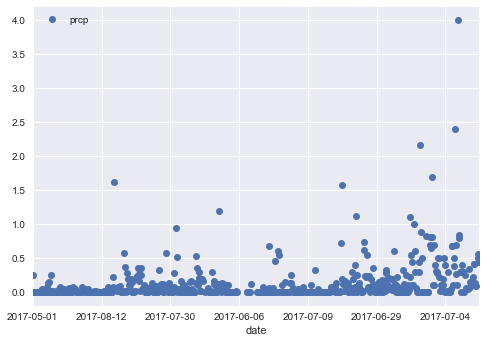

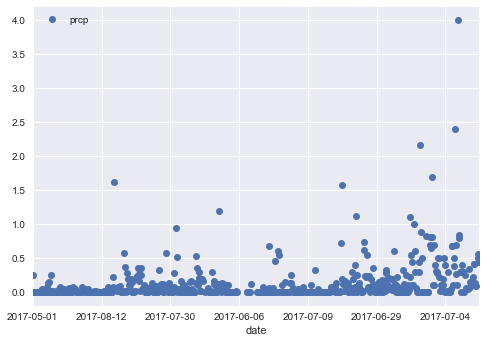

In [27]:
precip_df.plot(x='date', y='prcp', style='o')
plt.show()

In [28]:
precip_df.describe()

,prcp
count,595.000000
mean,0.125529
std,0.296911
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [ ]:
#Stations analysis


In [42]:
#results = session.query(Measurements.station).value_counts(sort=True, ascending=False)

#results = session.query(func.count(Measurements.station).order_by(Measurements.station).all()

session.query(func.count(Measurements.station)).all()


[(19550)]

In [55]:
# count distinct "station" values
session.query(func.count(distinct(Measurements.station))).all()


[(9)]

In [52]:
#count how many times each station appears


,count_1
0,9


In [39]:
#Temp analysis
# Total dates
session.query(func.count(Measurements.date)).all()

[(19550)]

In [40]:
# Earliest Date
session.query(Measurements.date).order_by(Measurements.date).first()

('2010-01-01')

In [41]:
# Latest Date
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')